# Practica 3: Regresión logística multi-clase y redes neuronales

In [178]:
# Library imports

import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
import operator

## Parte 1: Regresión logística multi-clase

In [144]:
data = loadmat('ex3data1.mat')

y = data['y'].ravel()
X = data['X']

m = np.shape(X)[0]

(-0.5, 199.5, 19.5, -0.5)

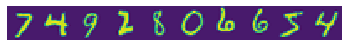

In [145]:
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape(-1, 20).T)
plt.axis('off')

### Regresión logística

In [150]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def log_regresion_cost(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1 = np.matmul(np.transpose(np.log(sigmoid_X_theta)), Y)
    
    term_2 = np.matmul(np.transpose(np.log((1- sigmoid_X_theta))),(1-Y))
    
    return - (term_1 + term_2) / np.shape(X)[0]

def log_regresion_gradient(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    return np.matmul(np.transpose(X),(sigmoid_X_theta - Y)) /  np.shape(X)[0]

###############


def log_regresion_regularized_cost(thetas, X, Y, Lambda):
    sigmoid_X_theta = sigmoid(np.matmul(X, thetas))
    
    term_1_1 = np.matmul(np.transpose(np.log(sigmoid_X_theta)), Y)
    term_1_2 = np.matmul(np.transpose(np.log((1 - sigmoid_X_theta))),(1-Y))
    
    term_1 = - (term_1_1 + term_1_2) / np.shape(X)[0]
    term_2 = Lambda/(2*m) * sum(thetas **2)
    
    return term_1 + term_2

def log_regresion_regularized_gradient(thetas, X, Y, Lambda):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1 = np.matmul(np.transpose(X),(sigmoid_X_theta - Y)) /  np.shape(X)[0]
    term_2 = (Lambda/m) * thetas

    return term_1 + term_2


In [155]:
def oneVsAll(X, Y, num_etiquetas, reg):
    """ 
    oneVsAll entrena varios clasificadores por reg resión logística con términode  regularización ’reg’ y devuelve el resultado en una matriz, donde la fila i−ésima corresponde          al clasificador de la etiqueta i−ésima
    """
    classifiers = np.zeros(shape=(10, 400))

    for label in range(1, num_etiquetas + 1):
         filtered_labels = (Y == label) * 1
        
         thetas = np.zeros(np.shape(X)[1])
         classifiers[label - 1] = opt.fmin_tnc(func=log_regresion_regularized_cost, x0= thetas, fprime=log_regresion_regularized_gradient, args=(X, filtered_labels, reg))[0]
    
    return classifiers

In [157]:
classifiers = oneVsAll(X, y, 10, 0.1)

(10, 400)


In [181]:
def predict(X, classifiers):
    predictions = {}
    Y_pred = []
    for image in range(np.shape(X)[0]):
        for i in range(classifiers.shape[0]):
            theta_opt = classifiers[i]
            label = i + 1

            prediction = round(sigmoid(np.matmul(np.transpose(theta_opt), X[image])), 4)
            predictions[label] = prediction
        
        Y_pred.append(max(predictions.items(), key=operator.itemgetter(1))[0])

    return Y_pred

In [195]:
def get_acurracy(Y, Y_pred):
    return np.sum((Y == np.array(Y_pred))) / m

print("El porcentaje de acierto del modelo es: {}%".format(get_acurracy(y, predict(X, classifiers)) * 100))

El porcentaje de acierto del modelo es: 95.88%


## Redes neuronales

In [198]:
# Weights loading
weights = loadmat('ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']